In [ ]:
import gspread
from google.colab import auth
from google.auth import default

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
print("✅ Google Colab is now authenticated!")

✅ Google Colab is now authenticated!


In [ ]:
spreadsheet = gc.open("Finance Tracker")
worksheet = spreadsheet.sheet1
print("✅ Google Sheet Connected Successfully!")

✅ Google Sheet Connected Successfully!


In [ ]:
import datetime

spreadsheet = gc.open("Finance Tracker")
worksheet = spreadsheet.sheet1

def add_transaction(date, category, amount, transaction_type):
    worksheet.append_row([date, category, amount, transaction_type])
    print(f"✅ Added: {date}, {category}, {amount}, {transaction_type}")

add_transaction(str(datetime.date.today()), "Salary", 50000, "Income")
add_transaction(str(datetime.date.today()), "Groceries", 2000, "Expense")
add_transaction(str(datetime.date.today()), "Rent", 10000, "Expense")

✅ Added: 2025-03-13, Salary, 50000, Income
✅ Added: 2025-03-13, Groceries, 2000, Expense
✅ Added: 2025-03-13, Rent, 10000, Expense


In [ ]:

data = worksheet.get_all_values()
df = pd.DataFrame(data, columns=["Date", "Category", "Amount", "Type"])
df.head()

,Date,Category,Amount,Type
0,Date,Category,Amount,
1,2025-03-13,Salary,50000,Income
2,2025-03-13,Groceries,2000,Expense
3,2025-03-13,Rent,10000,Expense


In [ ]:

data = worksheet.get_all_values()

df = pd.DataFrame(data)
print("🔹 Column Names in Your Google Sheet:")
print(df.iloc[0].tolist())

🔹 Column Names in Your Google Sheet:
['Date', 'Category', 'Amount', '']


In [ ]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.4 MB/s eta 0:00:00


In [ ]:

total_income = df[df["type"] == "Income"]["amount"].sum()
total_expenses = df[df["type"] == "Expense"]["amount"].sum()
savings = total_income - total_expenses

print(f"💰 Total Income: ₹{total_income}")
print(f"💸 Total Expenses: ₹{total_expenses}")
print(f"💾 Savings: ₹{savings}")

💰 Total Income: ₹50000
💸 Total Expenses: ₹12000
💾 Savings: ₹38000


In [ ]:

total_income = df[df["type"] == "Income"]["amount"].sum()
total_expenses = df[df["type"] == "Expense"]["amount"].sum()
savings = total_income - total_expenses

print(f"💰 Total Income: ₹{total_income}")
print(f"💸 Total Expenses: ₹{total_expenses}")
print(f"💾 Savings: ₹{savings}")

💰 Total Income: ₹50000
💸 Total Expenses: ₹12000
💾 Savings: ₹38000


In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import datetime


pdf_filename = "Finance_Tracker_Report.pdf"

c = canvas.Canvas(pdf_filename, pagesize=letter)
c.setFont("Helvetica", 12)

c.drawString(100, 750, "📊 Finance Tracker Summary Report")
c.drawString(100, 730, f"📅 Report Date: {datetime.datetime.now().strftime('%Y-%m-%d')}")
c.line(100, 725, 500, 725)

c.drawString(100, 700, f"💰 Total Income: ₹{total_income}")
c.drawString(100, 680, f"💸 Total Expenses: ₹{total_expenses}")
c.drawString(100, 660, f"💾 Savings: ₹{savings}")

c.drawString(100, 630, "📆 Monthly Expense Breakdown:")
y_position = 610
for month, expense in monthly_expense.items():
    c.drawString(120, y_position, f"{month}: ₹{expense}")
    y_position -= 20

c.save()
print(f"✅ PDF Report '{pdf_filename}' generated successfully!")

✅ PDF Report 'Finance_Tracker_Report.pdf' generated successfully!


In [ ]:

data = worksheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df[1:]
df.columns = df.columns.str.strip().str.lower()

df.rename(columns={"": "type"}, inplace=True)

df["amount"] = pd.to_numeric(df["amount"])
total_income = df[df["type"].str.lower() == "income"]["amount"].sum()
total_expense = df[df["type"].str.lower() == "expense"]["amount"].sum()

print(f"💰 Total Income: ₹{total_income}")
print(f"💸 Total Expenses: ₹{total_expense}")
print(f"📉 Savings: ₹{total_income - total_expense}")

💰 Total Income: ₹50000
💸 Total Expenses: ₹12000
📉 Savings: ₹38000


In [ ]:
from google.colab import files

files.download("Finance_Tracker_Report.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install yagmail

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 10.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


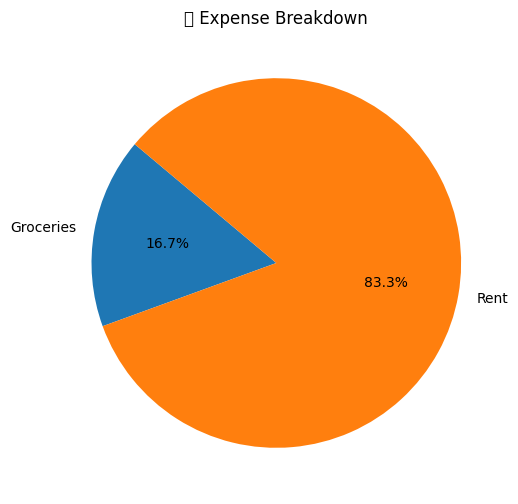

In [ ]:
import matplotlib.pyplot as plt
expense_data = df[df["type"].str.lower() == "expense"].groupby("category")["amount"].sum()
plt.figure(figsize=(6,6))
plt.pie(expense_data, labels=expense_data.index, autopct="%1.1f%%", startangle=140)
plt.title("💸 Expense Breakdown")
plt.show()

In [ ]:
import yagmail

sender_email = "yuva532@gmail.com"
app_password = "wljf pgdm yteo yrok"
receiver_email = "your-receiver@gmail.com"

subject = "📊 Monthly Finance Tracker Report"
body = f"""
Hello Yuva,

Here is your Finance Tracker summary:

💰 Total Income: ₹{total_income}
💸 Total Expenses: ₹{total_expenses}
💾 Savings: ₹{savings}

Your detailed report is attached as a PDF.

Best,
Your Finance Tracker Bot
"""

yag = yagmail.SMTP(sender_email, app_password)
yag.send(to=receiver_email, subject=subject, contents=body, attachments="Finance_Tracker_Report.pdf")

print("✅ Email sent successfully!")

✅ Email sent successfully!


In [ ]:
BUDGET_LIMIT = 10000

In [ ]:
yag = yagmail.SMTP("yuva532@gmail.com","wljf pgdm yteo yrok", "Finance Tracker Bot")  # Add sender name

In [ ]:

df["date"] = pd.to_datetime(df["date"])

df["month_year"] = df["date"].dt.to_period("M")

monthly_expense = df[df["type"].str.lower() == "expense"].groupby("month_year")["amount"].sum()

print("📆 Monthly Expense Report:")
print(monthly_expense)

📆 Monthly Expense Report:
month_year
2025-03    12000
Freq: M, Name: amount, dtype: int64


In [ ]:
import yagmail

In [ ]:
sender_email = "your-email@gmail.com"
app_password = "your-app-password"

yag = yagmail.SMTP(sender_email, app_password)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


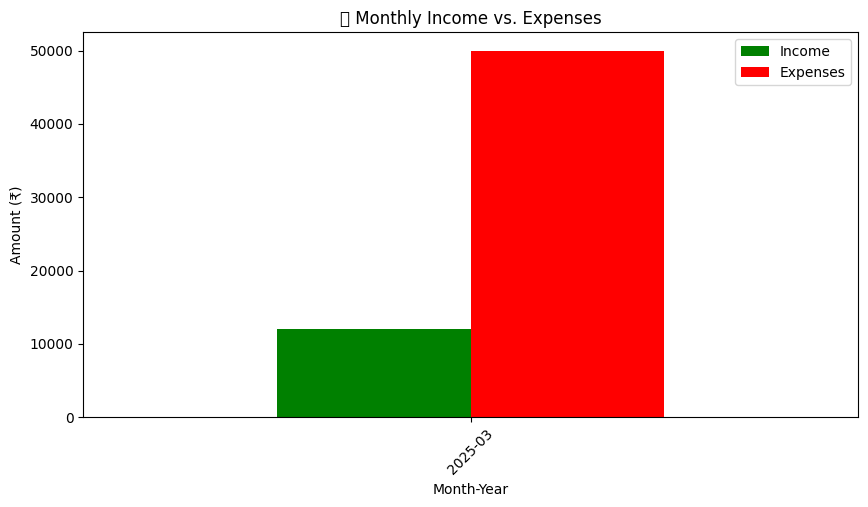

In [ ]:
import matplotlib.pyplot as plt

monthly_data = df.groupby(["month_year", "type"])["amount"].sum().unstack()

monthly_data.plot(kind="bar", figsize=(10, 5), color=["green", "red"])

plt.xlabel("Month-Year")
plt.ylabel("Amount (₹)")
plt.title("📊 Monthly Income vs. Expenses")
plt.legend(["Income", "Expenses"])
plt.xticks(rotation=45)

plt.show()

In [ ]:

expense_limit = 10000

overspent_months = monthly_expense[monthly_expense > expense_limit]

print(f"💰 Your monthly expense limit: ₹{expense_limit}\n")

if not overspent_months.empty:
    print("⚠ Warning! You exceeded the limit in these months:")
    print(overspent_months)
else:
    print("✅ Great job! You stayed within the budget every month")

💰 Your monthly expense limit: ₹10000

⚠ Warning! You exceeded the limit in these months:
month_year
2025-03    12000
Freq: M, Name: amount, dtype: int64
